In [18]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fastai.vision import *

In [19]:
path=Path('storage/ravdess_mod')

In [20]:
path.ls()

[PosixPath('storage/ravdess_mod/sad'),
 PosixPath('storage/ravdess_mod/happy'),
 PosixPath('storage/ravdess_mod/calm'),
 PosixPath('storage/ravdess_mod/surprised'),
 PosixPath('storage/ravdess_mod/disgust'),
 PosixPath('storage/ravdess_mod/angry'),
 PosixPath('storage/ravdess_mod/fearful'),
 PosixPath('storage/ravdess_mod/neutral')]

In [21]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, size=144, num_workers=4).normalize(imagenet_stats)

In [22]:
data.classes

['angry', 'calm', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [23]:
data?

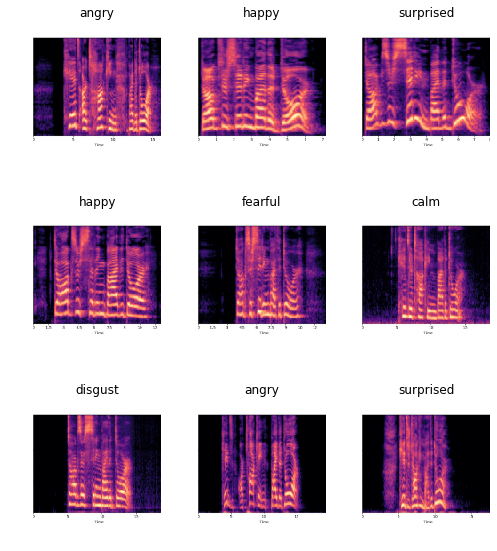

In [24]:
data.show_batch(rows=3, figsize=(7,8))

In [25]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [26]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,3.199655,2.433941,0.195266,00:14
1,2.462612,2.077495,0.390533,00:12
2,1.898184,2.060240,0.420118,00:10
3,1.498936,1.928374,0.414201,00:11
4,1.221037,1.887683,0.414201,00:11


In [27]:
learn.unfreeze()

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


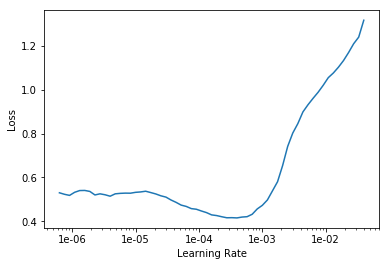

In [29]:
learn.recorder.plot()

In [30]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.465783,1.850206,0.437870,00:10
1,0.437210,1.859603,0.473373,00:10
2,0.350681,1.738555,0.485207,00:12
3,0.282884,1.688419,0.508876,00:11
4,0.234321,1.689965,0.497041,00:11


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


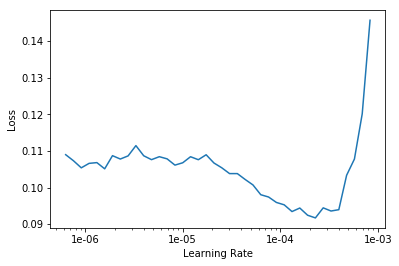

In [31]:
learn.lr_find()
learn.recorder.plot()

In [32]:
learn.fit_one_cycle(5, max_lr=7e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.119040,2.316994,0.378698,00:12
1,1.003809,5.097794,0.289941,00:11
2,1.312957,6.066257,0.343195,00:11
3,1.145681,1.968413,0.532544,00:12
4,0.981071,1.399362,0.615385,00:13


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


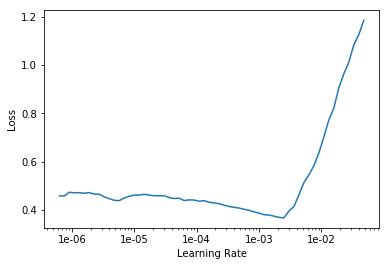

In [33]:
learn.lr_find()
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(5, max_lr=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,0.444186,1.292478,0.639053,00:09
1,0.398860,1.283728,0.674556,00:10
2,0.341132,1.128294,0.698225,00:09
3,0.291243,1.105424,0.704142,00:10
4,0.249989,1.121760,0.692308,00:11


In [47]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 72, 72]         9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 72, 72]         128        True      
______________________________________________________________________
ReLU                 [64, 72, 72]         0          False     
______________________________________________________________________
MaxPool2d            [64, 36, 36]         0          False     
______________________________________________________________________
Conv2d               [64, 36, 36]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 36, 36]         128        True      
______________________________________________________________________
ReLU                 [64, 36, 36]         0          False     
___________________________________________________

In [40]:
learn.save(Path("/notebooks/trained_model"), return_path=True)

PosixPath('/notebooks/trained_model.pth')